<h1><font color='darkblue'>Verkaufszahlen aus 2019 </font></h1>

## Importieren und Einlesen

### Importieren von Bibliotheken

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette()

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Einlesen von Daten

In [2]:
# einen Blick auf Dezember

df_dez = pd.read_csv('Sales_December_2019.csv')
print("Die große von Datensatz ist :", df_dez.shape)
df_dez.head(3)

Die große von Datensatz ist : (25117, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"


In [3]:
# einen Blick auf März

df_märz = pd.read_csv('Sales_March_2019.csv')
print("Die große von Datensatz ist :", df_märz.shape)
df_märz.head(3)

Die große von Datensatz ist : (15226, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"


<span style='color:red'> Wir sehen, dass die **csv Dateien** aus den gleichen Spalten bestehen. Und kombinieren wir alle Dateien in einem DataFrame.</span>

In [4]:
# get data file names
path =r'C:\Users\user\BIG DATA\PROJEKT'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Größe, Datentyp, Anzahl der Einzelwerte,  Null-Werte und Synonyme

In [5]:
df.shape

(186850, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
columns = list(df.columns)
columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

### Spaltennamen ändern

In [8]:
df.rename(columns={'Order ID': 'orderID', "Product":"product","Quantity Ordered":"quantity_ordered", "Price Each" : "price", "Order Date":"order_date", "Purchase Address":"adress"}, inplace=True)
df.head(5)

,orderID,product,quantity_ordered,price,order_date,adress
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Systemische Null Werte

In [9]:
def null_values(x):
    a = x.isnull().sum()
    b = 100 * x.isnull().sum()/x.shape[0]
    nv = pd.concat([a, round(b,2)], axis=1).rename(columns={0:'Missing_Values', 1:'Percentage (%)'})
    return nv[nv.Missing_Values>0].sort_values('Missing_Values', ascending=False)

In [10]:
null_values(df)

,Missing_Values,Percentage (%)
orderID,545,0.29
product,545,0.29
quantity_ordered,545,0.29
price,545,0.29
order_date,545,0.29
adress,545,0.29


In [11]:
df.loc[df["orderID"].isnull(),:]

,orderID,product,quantity_ordered,price,order_date,adress
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.dropna(axis=0)

In [13]:
null_values(df)

,Missing_Values,Percentage (%)


<span style='color:red'> jetzt befinden sich **keine Null Werte**</span>

### Synonyme (Null Werte)

In [14]:
df["quantity_ordered"].unique()  # Quantity Ordered !!!

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [15]:
df_str  =df[df["quantity_ordered"]=="Quantity Ordered"]
df_str

,orderID,product,quantity_ordered,price,order_date,adress
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
drop_synonym = df.loc[df["quantity_ordered"]=="Quantity Ordered",:].index
drop_synonym

Int64Index([   519,   1149,   1155,   2878,   2893,   3036,   3209,   3618,
              4138,   4645,
            ...
            183808, 184489, 184666, 184779, 185118, 185164, 185551, 186563,
            186632, 186738],
           dtype='int64', length=355)

In [17]:
df.drop(index=drop_synonym, inplace=True)
df.head(5)

,orderID,product,quantity_ordered,price,order_date,adress
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
df.reset_index(inplace=True)

In [19]:
null_values(df)

,Missing_Values,Percentage (%)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             185950 non-null  int64 
 1   orderID           185950 non-null  object
 2   product           185950 non-null  object
 3   quantity_ordered  185950 non-null  object
 4   price             185950 non-null  object
 5   order_date        185950 non-null  object
 6   adress            185950 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.9+ MB


### Dtype anpassen

<span style='color:red'> Es gibt keine Nullwerte. Dann können wir den Datentype ändern</span>

In [21]:
df["orderID"] = df["orderID"].astype("float")
df["quantity_ordered"] = df["quantity_ordered"].astype("float") # wir können ein object nicht direkt als int umwandeln  -->
                                                                # erst umwandeln in float und danach vom float zu int
df["price"] = df["price"].astype("float")
df["order_date"] = df["order_date"].astype("datetime64[ns]")
df["quantity_ordered"] = df["quantity_ordered"].astype("int64") #jetzt zu int
df["orderID"] = df["orderID"].astype("int64")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             185950 non-null  int64         
 1   orderID           185950 non-null  int64         
 2   product           185950 non-null  object        
 3   quantity_ordered  185950 non-null  int64         
 4   price             185950 non-null  float64       
 5   order_date        185950 non-null  datetime64[ns]
 6   adress            185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 9.9+ MB


### Duplicated

In [23]:
df.loc[df['orderID'].duplicated()==True,:]

,index,orderID,product,quantity_ordered,price,order_date,adress
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
18,19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001"
30,31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
32,33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016"
119,120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001"
...,...,...,...,...,...,...,...
185885,186784,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"
185886,186785,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"
185893,186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301"
185905,186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301"


In [24]:
df.loc[df['orderID']==259297,:] 

,index,orderID,product,quantity_ordered,price,order_date,adress
185884,186783,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"
185885,186784,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"
185886,186785,259297,Lightning Charging Cable,1,14.95,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215"


<span style='color:red'> Diese Zeilen sind keine Duplikate, sondern eine Bestellung mit mehr als einem Artikel.</span>

### Ausreißer

In [25]:
df.describe()

,index,orderID,quantity_ordered,price
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,93428.643060,230417.569379,1.124383,184.399735
std,53938.250088,51512.737110,0.442793,332.731330
min,0.000000,141234.000000,1.000000,2.990000
25%,46716.250000,185831.250000,1.000000,11.950000
50%,93434.500000,230367.500000,1.000000,14.950000
75%,140146.750000,275035.750000,1.000000,150.000000
max,186849.000000,319670.000000,9.000000,1700.000000


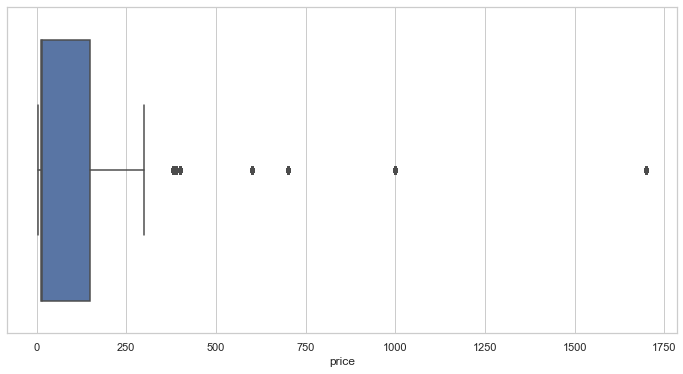

In [26]:
df["price"]

plt.figure(figsize=(12,6))

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df["price"])

In [27]:
über_1500  = df.loc[df["price"]>1500,:]
über_1500

,index,orderID,product,quantity_ordered,price,order_date,adress
8,9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
85,86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016"
89,90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215"
92,93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035"
135,136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185619,186514,259041,Macbook Pro Laptop,1,1700.0,2019-09-13 23:14:00,"220 Sunset St, New York City, NY 10001"
185739,186637,259157,Macbook Pro Laptop,1,1700.0,2019-09-12 05:01:00,"326 Forest St, Seattle, WA 98101"
185888,186787,259299,Macbook Pro Laptop,1,1700.0,2019-09-30 23:59:00,"240 Chestnut St, Los Angeles, CA 90001"
185898,186797,259308,Macbook Pro Laptop,1,1700.0,2019-09-26 19:16:00,"912 8th St, Boston, MA 02215"


<span style='color:red'> Wir sehen, dass diese keine "Ausreisser" sind. Denn das Produkt ist "Macbook Pro Laptop".</span>


## Neue Spalte Erstellen (Feature Engineering)

### Datum : Monat, Wochen Tag, Zeit, Wochenende

In [28]:
df['year'] = df["order_date"].dt.year
df['monat'] = df['order_date'].dt.month
df['day'] = df["order_date"].dt.day
df['Uhr'] = df['order_date'].dt.hour
df['wochentag'] = df['order_date'].dt.dayofweek
df['wochenende'] = np.where(df['wochentag'] < 5,'nein','ja')

dayOfWeek={0:'Montag', 1:'Dienstag', 2:'Mittwoch', 3:'Donerstag', 4:'Freitag', 5:'Samstag', 6:'Sonntag'}
df['wochentag'] = df['wochentag'].map(dayOfWeek)

df.head(5)

,index,orderID,product,quantity_ordered,price,order_date,adress,year,monat,day,Uhr,wochentag,wochenende
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,Freitag,nein
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,Sonntag,ja
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,Freitag,nein
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,Freitag,nein
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,Dienstag,nein


### Total Umsatz

In [29]:
df["total_amount"] = df["quantity_ordered"]*df["price"]
df.head(2)

,index,orderID,product,quantity_ordered,price,order_date,adress,year,monat,day,Uhr,wochentag,wochenende,total_amount
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,Freitag,nein,23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,Sonntag,ja,99.99


### Adresse - Stadt

In [30]:
df["stadt"] = df["adress"].str.split(',').str[1]
df.head(2)

,index,orderID,product,quantity_ordered,price,order_date,adress,year,monat,day,Uhr,wochentag,wochenende,total_amount,stadt
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,Freitag,nein,23.90,Dallas
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,Sonntag,ja,99.99,Boston


## Speicherplatz Optimieren

In [31]:
df.dtypes

index                        int64
orderID                      int64
product                     object
quantity_ordered             int64
price                      float64
order_date          datetime64[ns]
adress                      object
year                         int64
monat                        int64
day                          int64
Uhr                          int64
wochentag                   object
wochenende                  object
total_amount               float64
stadt                       object
dtype: object

In [32]:
# Um später die Speicherplatzersparniss errechnen zu können, arbeiten wir im weiteren mit einer Kopie. 

df = df.copy()

In [33]:
# schauen, ob der richtige Speicherplatz festgelegt ist  - memory_usage() --> Rückgabewert: speicherplatz in bytes

memory_before = df.memory_usage(deep=True) 
memory_before

# hier werden Spalten mit dem Datentyp Object näher angeschaut und geprüft wie groß deren 
# "system-level memory consumption" ist.

Index                    128
index                1487600
orderID              1487600
product             14272160
quantity_ordered     1487600
price                1487600
order_date           1487600
adress              16890167
year                 1487600
monat                1487600
day                  1487600
Uhr                  1487600
wochentag           11980827
wochenende          11236864
total_amount         1487600
stadt               12590624
dtype: int64

<span style='color:red'> Anzahl eindeutiger Werte und Datentyp der Spalten</span>

In [34]:
df_types = pd.concat([df.dtypes, df.nunique()], axis=1).rename(columns={0:"dtypes",1:"unique"})
df_types

,dtypes,unique
index,int64,185950
orderID,int64,178437
product,object,19
quantity_ordered,int64,9
price,float64,17
order_date,datetime64[ns],142395
adress,object,140787
year,int64,2
monat,int64,12
day,int64,31


<span style='color:red'>Für "category" Datentypen geeignete Spalten:\
    product:19,   wochentag:7,    wochenende:2,   stadt:9</span>

In [35]:
df[['product','wochenende','stadt']] = df[['product','wochenende','stadt']].astype('category')


df[['orderID','quantity_ordered','year','monat','day','Uhr']] = df[['orderID','quantity_ordered','year','monat','day','Uhr']].apply(pd.to_numeric, downcast='integer')
df[['price','total_amount']] = df[['price','total_amount']].apply(pd.to_numeric, downcast='float')

In [36]:
memory_after = df.memory_usage(deep=True)
memory_after

Index                    128
index                1487600
orderID               743800
product               187919
quantity_ordered      185950
price                 743800
order_date           1487600
adress              16890167
year                  371900
monat                 185950
day                   185950
Uhr                   185950
wochentag           11980827
wochenende            186178
total_amount          743800
stadt                 186849
dtype: int64

In [37]:
# gesamte in-memory-Speicherplatzreduzierung

reduction = (memory_before.sum()-memory_after.sum())/memory_before.sum() *100

print(f"Speicherplatzreduzierung={reduction:0.2f}%")

Speicherplatzreduzierung=56.32%


## EDA

### Die meist verkaufte Produkte

In [38]:
verk_prod=df.groupby(by=['product'])['quantity_ordered'].sum().sort_values(ascending=False).iloc[:10]
df_top_prod=verk_prod.to_frame().reset_index()
df_top_prod.head(10)

,product,quantity_ordered
0,AAA Batteries (4-pack),31017.0
1,AA Batteries (4-pack),27635.0
2,USB-C Charging Cable,23975.0
3,Lightning Charging Cable,23217.0
4,Wired Headphones,20557.0
5,Apple Airpods Headphones,15661.0
6,Bose SoundSport Headphones,13457.0
7,27in FHD Monitor,7550.0
8,iPhone,6849.0
9,27in 4K Gaming Monitor,6244.0


In [39]:
pd.options.display.float_format ='{:,.3f}'.format

df_burnst = df.groupby(['stadt','product'], as_index=False).agg(Anzahl_der_Waren=('quantity_ordered','sum'), Umsatz=('total_amount','sum'))
df_burnst

,stadt,product,Anzahl_der_Waren,Umsatz
0,Atlanta,20in Monitor,342.000,"37,616.578"
1,Atlanta,27in 4K Gaming Monitor,493.000,"192,265.062"
2,Atlanta,27in FHD Monitor,588.000,"88,194.125"
3,Atlanta,34in Ultrawide Monitor,482.000,"183,155.172"
4,Atlanta,AA Batteries (4-pack),"2,193.000","8,421.120"
...,...,...,...,...
166,Seattle,ThinkPad Laptop,333.000,"332,996.656"
167,Seattle,USB-C Charging Cable,"1,869.000","22,334.549"
168,Seattle,Vareebadd Phone,179.000,"71,600.000"
169,Seattle,Wired Headphones,"1,652.000","19,807.480"


In [40]:
fig = px.sunburst(df_burnst, path=["product"],
                 values="Umsatz",
                 color = "product")
fig.show()

In [41]:
fig = px.sunburst(df_burnst, path=['stadt', 'product'],
                 values="Umsatz",
                 color = "stadt")
fig.show()

In [42]:
fig = px.sunburst(df_burnst, path=['product','stadt'],
                 values="Anzahl_der_Waren",
                 color = "product")
fig.show()

In [43]:
fig = px.treemap(df_burnst, path=["stadt", 'product'], values='Umsatz',
                  color='Umsatz', hover_data=['stadt'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_burnst['Umsatz']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Anzahl der Bestellungen nach Wochentag

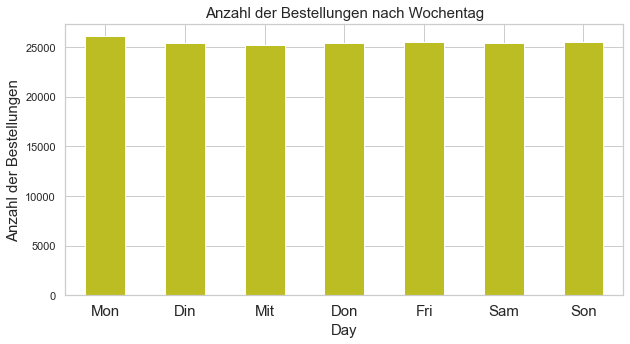

In [44]:
ax = df.groupby('orderID')['wochentag'].unique().value_counts().sort_index().plot(kind='bar',color=color[8],figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Anzahl der Bestellungen',fontsize=15)
ax.set_title('Anzahl der Bestellungen nach Wochentag',fontsize=15)
ax.set_xticklabels(('Mon','Din','Mit','Don','Fri','Sam','Son'), rotation='horizontal', fontsize=15)
plt.show()

In [45]:
durch_sales = round(df.groupby("monat")[["total_amount"]].mean().sort_values(by="monat",ascending=True))
durch_sales = durch_sales.reset_index()
print("Durchschnittliche Ausgabe pro Bestellung nach Land :\n\n", durch_sales)

Durchschnittliche Ausgabe pro Bestellung nach Land :

     monat  total_amount
0       1       188.000
1       2       184.000
2       3       185.000
3       4       185.000
4       5       190.000
5       6       190.000
6       7       185.000
7       8       188.000
8       9       180.000
9      10       184.000
10     11       182.000
11     12       185.000


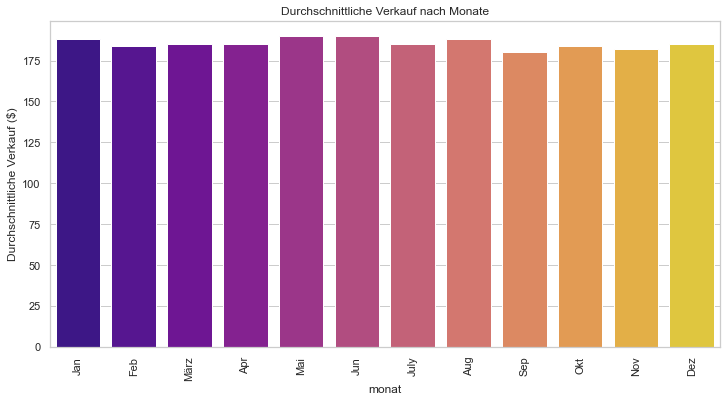

In [46]:
aa = durch_sales["monat"]
bb = durch_sales["total_amount"]

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_context('notebook')
sns.barplot(aa,bb, palette="plasma")
ax.set_title("Durchschnittliche Verkauf nach Monate")
ax.set_ylabel('Durchschnittliche Verkauf ($)')
ax.set_xticklabels(('Jan','Feb','März','Apr','Mai','Jun','July','Aug','Sep','Okt','Nov','Dez'),rotation=90);

In [47]:
durch_sales = round(df.groupby("monat")[["total_amount"]].sum().sort_values(by="monat",ascending=True))
durch_sales = durch_sales.reset_index()
print("Durchschnittliche Ausgabe pro Bestellung nach Land :\n\n", durch_sales)

Durchschnittliche Ausgabe pro Bestellung nach Land :

     monat  total_amount
0       1 1,822,257.000
1       2 2,202,022.000
2       3 2,807,100.000
3       4 3,390,670.000
4       5 3,152,607.000
5       6 2,577,802.000
6       7 2,647,776.000
7       8 2,244,468.000
8       9 2,097,560.000
9      10 3,736,727.000
10     11 3,199,603.000
11     12 4,613,444.000


In [48]:
df.groupby("monat")[["total_amount"]].sum().sort_values(by="monat",ascending=True)

,total_amount
monat,
1,"1,822,256.750"
2,"2,202,022.500"
3,"2,807,100.250"
4,"3,390,670.250"
5,"3,152,606.750"
6,"2,577,802.250"
7,"2,647,775.750"
8,"2,244,467.750"
9,"2,097,560.000"


### Gesamtumsatz nach Monate

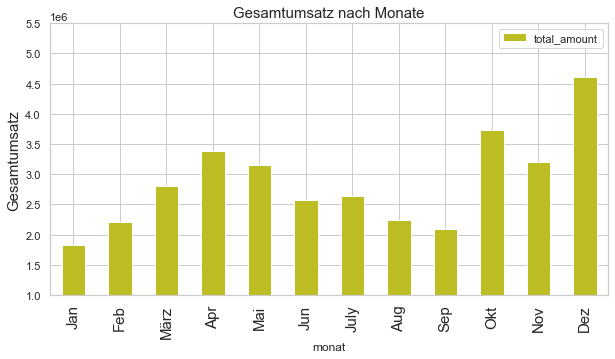

In [51]:
ax = df.groupby("monat")[["total_amount"]].sum().sort_values(by="monat",ascending=True).sort_index().plot(kind='bar',color=color[8],figsize=(10,5))
ax.set_ylabel('Gesamtumsatz',fontsize=15)

ax.set(ylim = (1000000,5500000)) 

ax.set_title('Gesamtumsatz nach Monate',fontsize=15)
ax.set_xticklabels(('Jan','Feb','März','Apr','Mai','Jun','July','Aug','Sep','Okt','Nov','Dez'),rotation=90, fontsize=15);
plt.show()

### Welche Art von Produkt bringt uns den höchsten Umsatz?

In [52]:
pd.options.display.float_format ='{:,.3f}'.format

df_waren = df.groupby('product', as_index=False).agg(Anzahl_der_Waren=('quantity_ordered','sum'), Umsatz=('total_amount','sum'))
df_waren

,product,Anzahl_der_Waren,Umsatz
0,20in Monitor,"4,129.000","454,148.688"
1,27in 4K Gaming Monitor,"6,244.000","2,435,097.500"
2,27in FHD Monitor,"7,550.000","1,132,424.500"
3,34in Ultrawide Monitor,"6,199.000","2,355,558.000"
4,AA Batteries (4-pack),"27,635.000","106,118.398"
5,AAA Batteries (4-pack),"31,017.000","92,740.828"
6,Apple Airpods Headphones,"15,661.000","2,349,150.000"
7,Bose SoundSport Headphones,"13,457.000","1,345,565.375"
8,Flatscreen TV,"4,819.000","1,445,700.000"
9,Google Phone,"5,532.000","3,319,200.000"


In [53]:
df_waren['Umsatz'].min(), df_waren['Umsatz'].max()

(92740.828125, 8037600.0)

In [54]:
max_best_anzahl = df.groupby("day")["orderID"].count().max()

most_day1 = df.groupby("day")[["orderID"]].count().reset_index()
most_day_last = most_day1.index[most_day1["orderID"] == most_day1["orderID"].max()][0]
most_day_last

print("Der meistverkaufte Tag ist der {}. Tag des Monats und die Anzahl der Bestellungen beträgt {}".format(most_day_last, max_best_anzahl))

Der meistverkaufte Tag ist der 12. Tag des Monats und die Anzahl der Bestellungen beträgt 6306


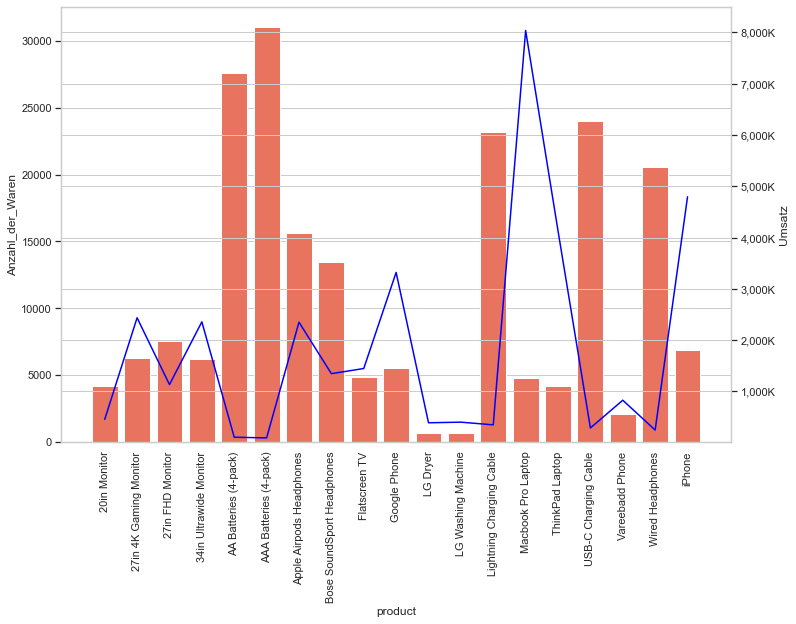

In [55]:
fig, ax_anzahl = plt.subplots(figsize=(12,8))

g1 = sns.barplot(data=df_waren,x='product', y='Anzahl_der_Waren', color='tomato', ax=ax_anzahl)
ax_umzatz = ax_anzahl.twinx()
g2 = sns.lineplot(data=df_waren,x='product', y='Umsatz', color='blue', ax=ax_umzatz)

ax_anzahl.tick_params(axis='x', rotation=90)
ax_umzatz.set(ylim = (20000,8500000)) 
ylabel_umsatz = ['{:,.0f}'.format(x) + 'K' for x in g2.get_yticks()/1000]
g2.set_yticklabels(ylabel_umsatz)

plt.show()

<span style='color:red'> Obwohl die verkaufszahlen von "Iphone", "Macbook Pro" und "ThinkPad" sehr gering sind, haben diese Produkte höhe Gesamtzumsatz.</span>

### Gesamtumsatz nach Städte

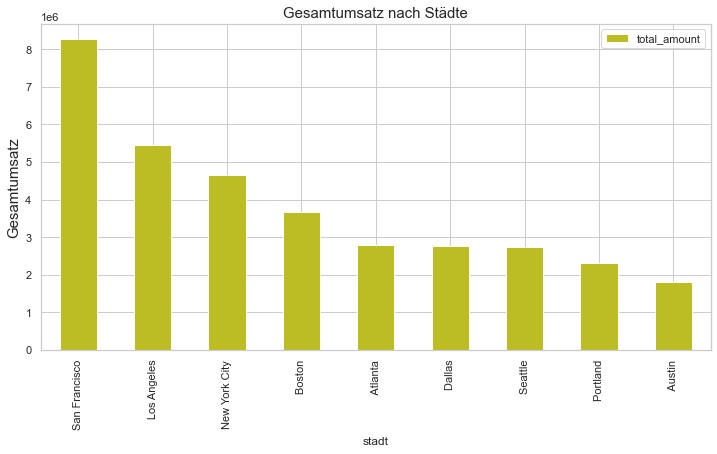

In [56]:
ax = df.groupby("stadt")[["total_amount"]].sum().sort_values(by="total_amount",ascending=False).plot(kind='bar',color=color[8],figsize=(12,6))
ax.set_ylabel('Gesamtumsatz',fontsize=15)

ax.set_title('Gesamtumsatz nach Städte',fontsize=15)
plt.show()

### Welche Städte haben den höchsten Umsatz?

In [57]:
pd.options.display.float_format ='{:,.3f}'.format

df_städte = df.groupby('stadt', as_index=False).agg(anzahl_der_waren=('quantity_ordered','sum'), umsatz=('total_amount','sum'))
df_städte

,stadt,anzahl_der_waren,umsatz
0,Atlanta,"16,602.000","2,795,498.500"
1,Austin,"11,153.000","1,819,581.750"
2,Boston,"22,528.000","3,661,642.000"
3,Dallas,"16,730.000","2,767,975.500"
4,Los Angeles,"33,289.000","5,452,571.000"
5,New York City,"27,932.000","4,664,317.500"
6,Portland,"14,053.000","2,320,490.500"
7,San Francisco,"50,239.000","8,262,204.000"
8,Seattle,"16,553.000","2,747,755.500"


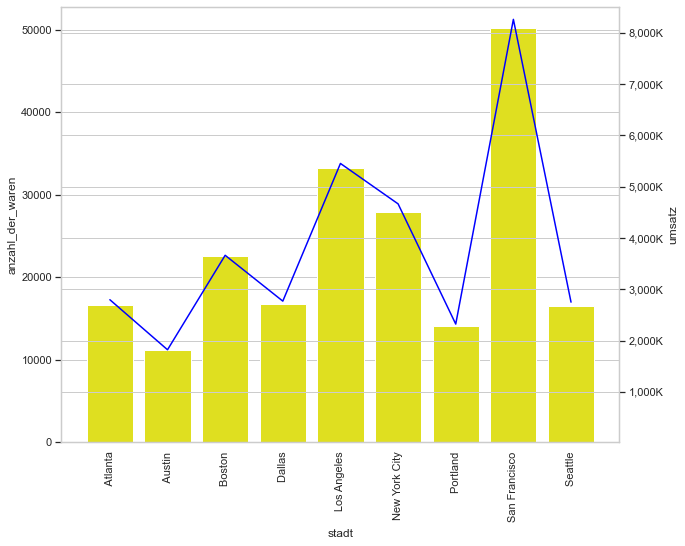

In [58]:
fig, ax_anzahl = plt.subplots(figsize=(10,8))

g1 = sns.barplot(data=df_städte,x='stadt', y='anzahl_der_waren', color='yellow', ax=ax_anzahl)
ax_umzatz = ax_anzahl.twinx()
g2 = sns.lineplot(data=df_städte,x='stadt', y='umsatz', color='blue', ax=ax_umzatz)

ax_anzahl.tick_params(axis='x', rotation=90)
ax_umzatz.set(ylim = (20000,8500000)) 
ylabel_umsatz = ['{:,.0f}'.format(x) + 'K' for x in g2.get_yticks()/1000]
g2.set_yticklabels(ylabel_umsatz)

plt.show()